### ***Package used for project***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### ***Create Object Oriented Progamming***



In [4]:
class MACDInvestment:
    def __init__(self, data, budget, short_window=12, long_window=26, signal_window=9):
        self.data = data
        self.budget = budget
        self.short_window = short_window
        self.long_window = long_window
        self.signal_window = signal_window

    def calculate_macd(self):
        short_ema = self.data['Close'].ewm(span=self.short_window, adjust=False).mean()
        long_ema = self.data['Close'].ewm(span=self.long_window, adjust=False).mean()
        self.data['MACD'] = short_ema - long_ema
        self.data['Signal Line'] = self.data['MACD'].ewm(span=self.signal_window, adjust=False).mean()

    def generate_signals(self):
        self.data['Signal'] = 0
        self.data['Signal'][self.short_window:] = np.where(
            self.data['MACD'][self.short_window:] > self.data['Signal Line'][self.short_window:], 1, -1
        )

    def calculate_profit(self):
        position = 0
        self.profit = 0
        for i in range(len(self.data)):
            if self.data['Signal'][i] == 1 and position == 0:
                position = self.budget // self.data['Close'][i]
                self.budget -= position * self.data['Close'][i]
            elif self.data['Signal'][i] == -1 and position > 0:
                self.budget += position * self.data['Close'][i]
                self.profit += (self.data['Close'][i] - self.data['Close'][i-1]) * position
                position = 0

        change_rate = (self.profit / (self.budget + self.profit)) * 100
        return self.profit, change_rate

    def plot_data(self):
        plt.figure(figsize=(12, 8))
        plt.subplot(2, 1, 1)
        plt.plot(self.data['Close'], label='Close Price')

        # Lọc ra các tín hiệu mua và bán
        buy_signals = self.data[self.data['Signal'] == 1].dropna()
        sell_signals = self.data[self.data['Signal'] == -1].dropna()

        plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal')
        plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal')
        plt.legend()
        plt.title('Stock Price and Buy/Sell Signals')

        plt.subplot(2, 1, 2)
        plt.plot(self.data['MACD'], label='MACD')
        plt.plot(self.data['Signal Line'], label='Signal Line')
        plt.legend()
        plt.title('MACD and Signal Line')

        plt.tight_layout()
        plt.show()

    def print_trade_signals(self):
        buy_signals = self.data[self.data['Signal'] == 1]
        sell_signals = self.data[self.data['Signal'] == -1]

        print("Buy Signals:")
        for date, row in buy_signals.iterrows():
            print(f"Date: {date}, Price: {row['Close']}")

        print("\nSell Signals:")
        for date, row in sell_signals.iterrows():
            print(f"Date: {date}, Price: {row['Close']}")


### ***TEST RUN***

C:\Users\MSI\AppData\Local\Temp\ipykernel_14780\1169856359.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.data['Signal'][self.short_window:] = np.where(
C:\Users\MSI\AppData\Local\Temp\ipykernel_14780\1169856359.py:17: SettingWith

Total profit: -2701.5632934570312
Change rate: -34.79%
Buy Signals:
Date: 2024-06-02 19:45:00-04:00, Price: 76.7699966430664
Date: 2024-06-02 19:50:00-04:00, Price: 76.75
Date: 2024-06-02 19:55:00-04:00, Price: 76.7699966430664
Date: 2024-06-02 20:00:00-04:00, Price: 76.7699966430664
Date: 2024-06-02 20:05:00-04:00, Price: 76.7300033569336
Date: 2024-06-02 20:10:00-04:00, Price: 76.73999786376953
Date: 2024-06-02 20:15:00-04:00, Price: 76.77999877929688
Date: 2024-06-02 20:20:00-04:00, Price: 76.81999969482422
Date: 2024-06-02 20:25:00-04:00, Price: 76.80000305175781
Date: 2024-06-02 20:30:00-04:00, Price: 76.79000091552734
Date: 2024-06-02 20:35:00-04:00, Price: 76.80000305175781
Date: 2024-06-02 20:40:00-04:00, Price: 76.80000305175781
Date: 2024-06-02 20:45:00-04:00, Price: 76.88999938964844
Date: 2024-06-02 20:50:00-04:00, Price: 76.9800033569336
Date: 2024-06-02 20:55:00-04:00, Price: 77.0199966430664
Date: 2024-06-02 21:00:00-04:00, Price: 77.27999877929688
Date: 2024-06-02 21:05

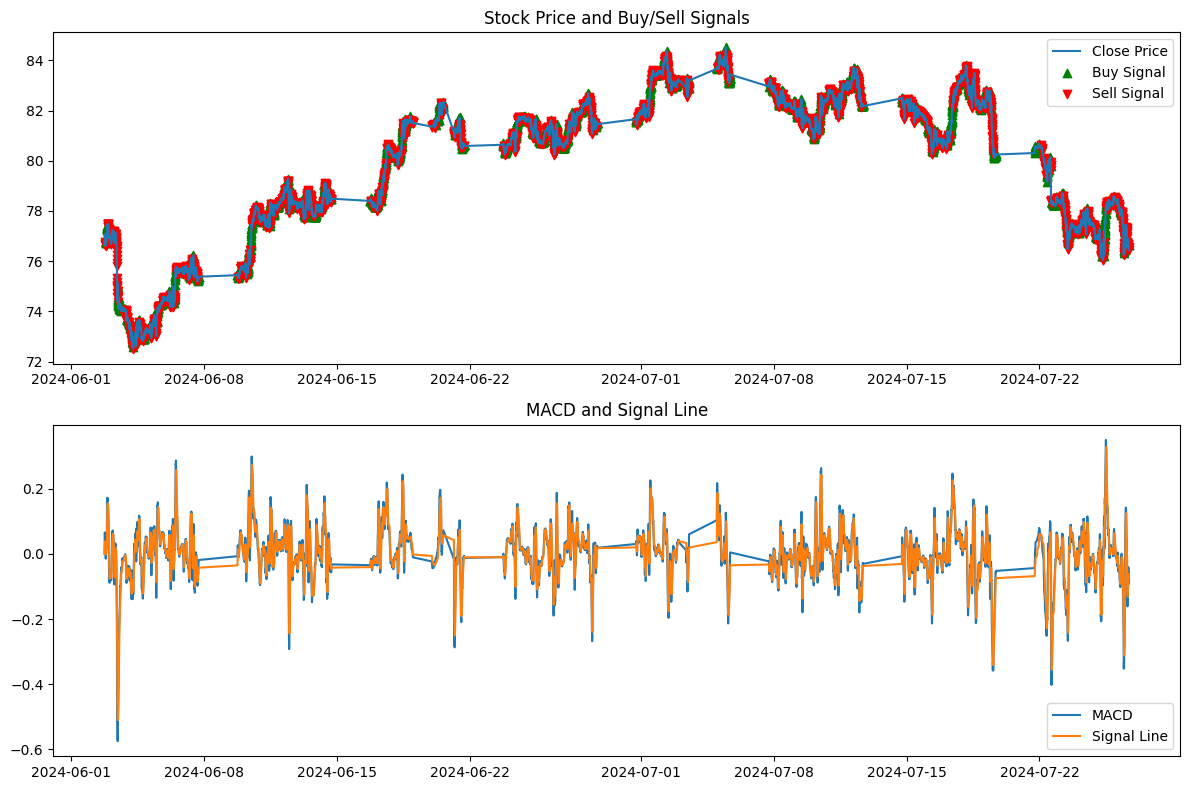

In [6]:
if __name__ == "__main__":
    data = pd.read_csv("OIL_5m.csv", parse_dates=['Datetime'], index_col='Datetime')
    macd_investment = MACDInvestment(data=data, budget=10000)
    macd_investment.calculate_macd()
    macd_investment.generate_signals()
    profit, change_rate = macd_investment.calculate_profit()
    print(f"Total profit: {profit}")
    print(f"Change rate: {change_rate:.2f}%")
    macd_investment.print_trade_signals()
    macd_investment.plot_data()